## **Dataset Overview: Breast Cancer Dataset (from sklearn)**

The **Breast Cancer** dataset is a well-known dataset available in the sklearn library, primarily used for classification tasks. The dataset contains information about various features of cell nuclei from breast cancer biopsies, with the goal of predicting whether the tumor is **malignant** (cancerous) or **benign** (non-cancerous).

The dataset contains 30 features, derived from digital images of fine needle aspirate (FNA) of breast cancer tumors. These features represent various measurements related to the shape and texture of the cell nuclei.

## **Data Acquisition**

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset from sklearn
data = load_breast_cancer()

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column to the DataFrame
df['target'] = data.target

In [2]:
# Display the first 5 rows of the dataset
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## **Data Cleaning**

In [3]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
# Check for missing values
print(f"Missing value count in each column:\n {df.isnull().sum()}")

Missing value count in each column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [5]:
# Check for duplicates
print(f"Duplicate rows : {df.duplicated().sum()}")

Duplicate rows : 0


In [6]:
# Basic statistics of the dataset
print("Descriptive Statistics:\n")
print(df.describe())

Descriptive Statistics:

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000         

**Observation :** This dataset's datatypes are correct, doesn't have missing values and no duplicate rows, hence dataset is cleaned and we can move to data preprocessing steps

In [7]:
# Separate features (X) from the target variable (y)
X = df.drop(columns=['target'])
y = df['target']

## **Feature Selection**

In [8]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Perform feature selection using RFE with a RandomForest classifier as the estimator
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=estimator, n_features_to_select=10)
rfe.fit(X, y)

# Get and display the names of the top 10 selected features
selected_features = X.columns[rfe.support_]
print("Best 10 Features:\n")
print(selected_features)

# Filter the dataset to keep only the selected features
X_selected = X[selected_features]

Best 10 Features:

Index(['mean perimeter', 'mean area', 'mean concavity', 'mean concave points',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


## **Data Preprocessing**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply feature scaling to the selected features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training data

X_test_scaled = scaler.transform(X_test)  # Transform the test data using the same scaler

# **Visualizations**


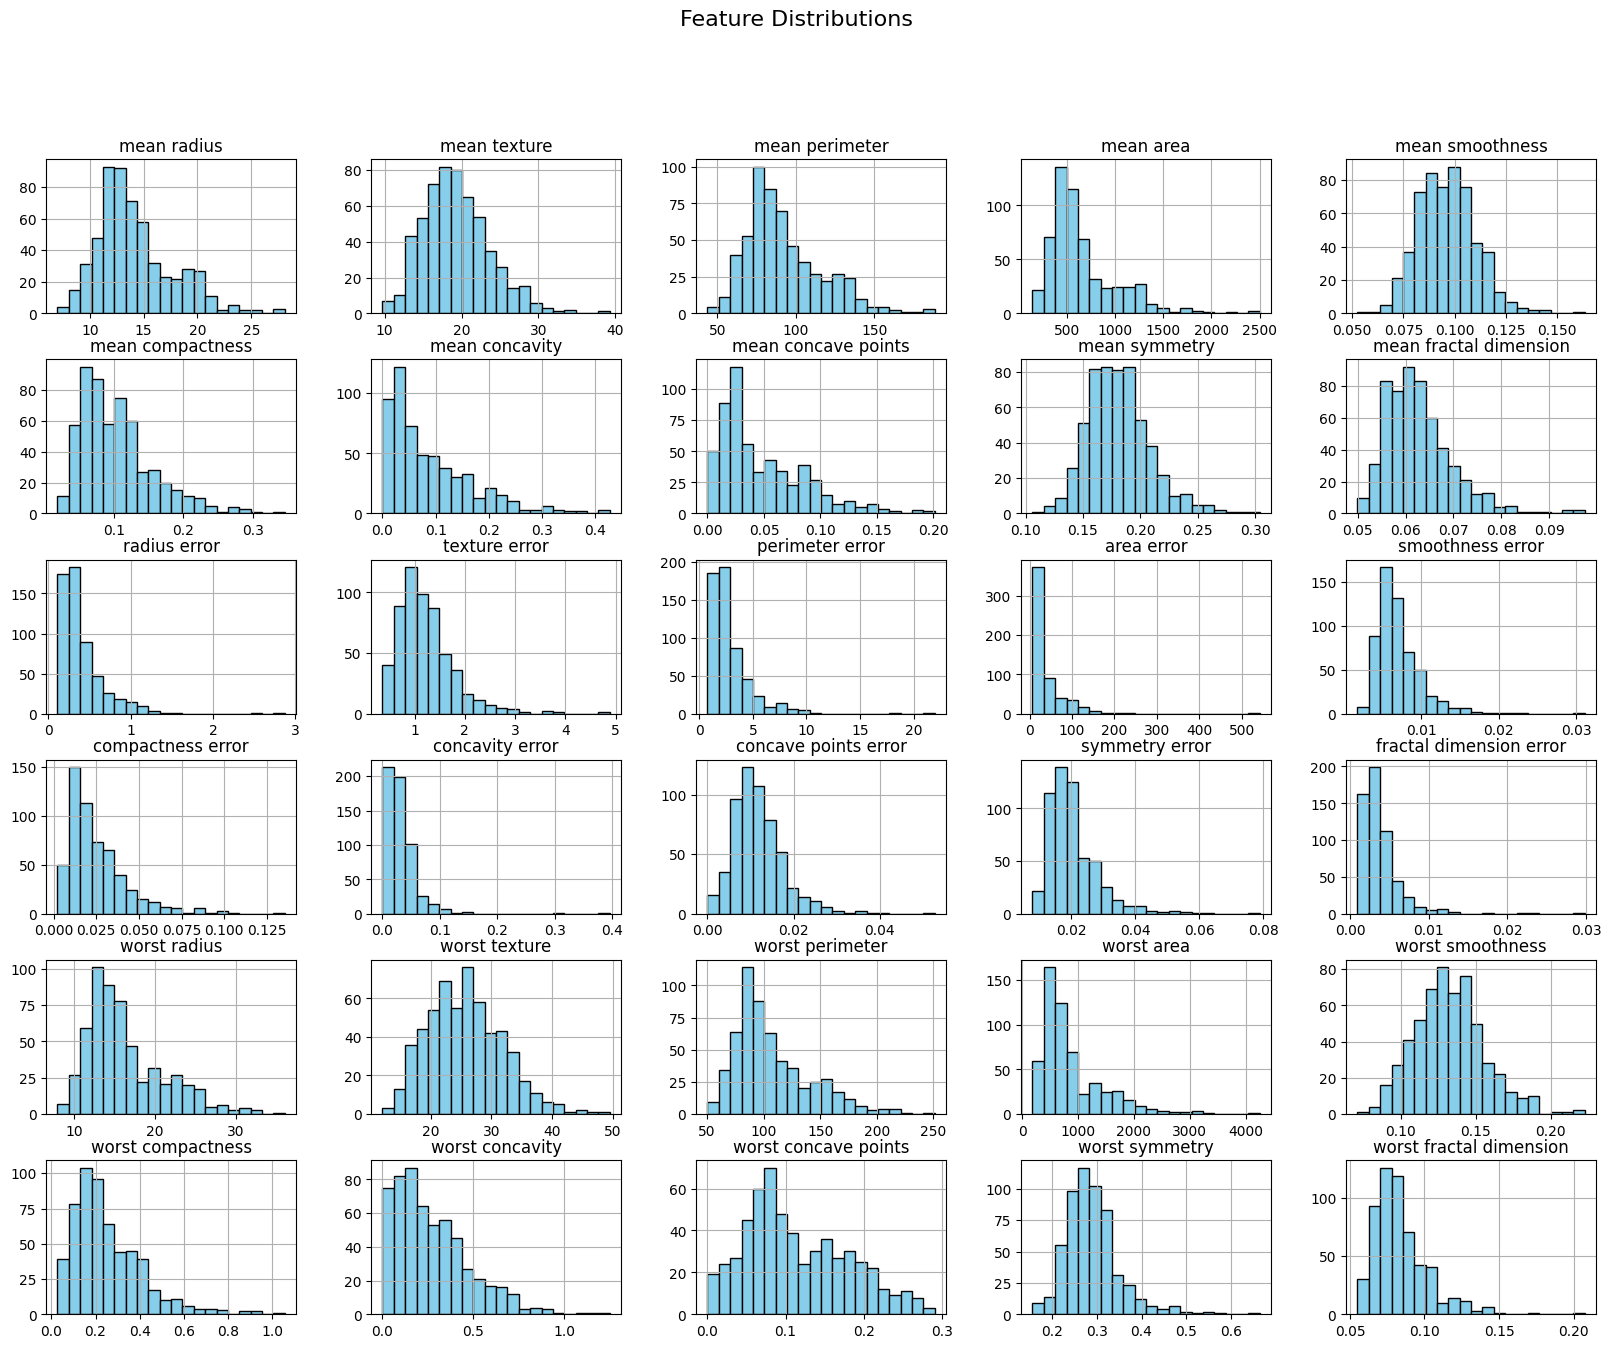

In [10]:
df.drop('target', axis=1).hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()


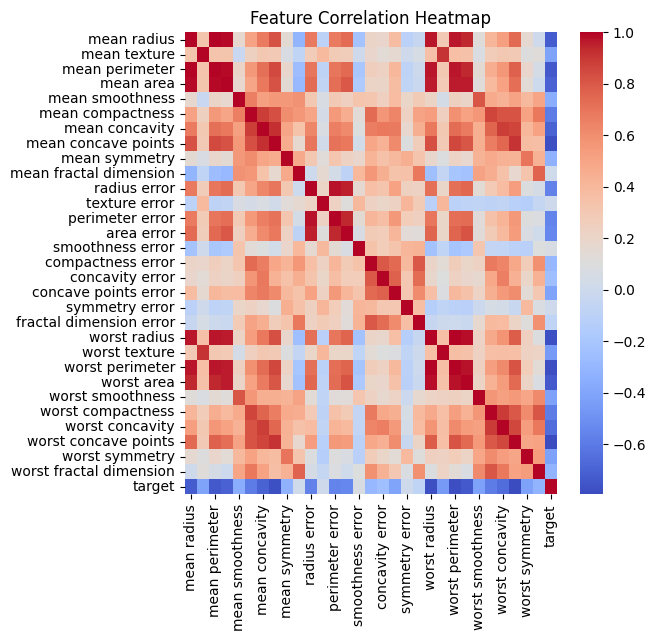

In [11]:
plt.figure(figsize=(6, 6))
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


## **ANN Model Building**

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Artificial Neural Network (ANN) model with specified parameters
ann = MLPClassifier(random_state=42, max_iter=1000)

# Train the ANN model using the scaled training data
ann.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ann.predict(X_test_scaled)

# Evaluate and display the model's performance
print("ANN Model Evaluation:|n")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")  # Accuracy score
print("Classification Report:")
print(classification_report(y_test, y_pred))  # Detailed classification metrics (precision, recall, F1-score)

ANN Model Evaluation:|n
Accuracy: 0.9736842105263158

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## **Hyperparameter Tuning**

In [14]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to tune for the ANN model
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (200,)],  # Number of neurons in the hidden layer
    'activation': ['tanh', 'relu'],  # Activation functions to try
    'solver': ['adam', 'sgd'],  # Optimization algorithms to test
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization term to avoid overfitting
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedules
}

# Perform hyperparameter tuning using GridSearchCV with cross-validation
grid_search = GridSearchCV(MLPClassifier(max_iter=500, early_stopping=True, random_state=42), param_grid, cv=5, n_jobs=-1)

# Fit the grid search model to the training data
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters and the best cross-validation score from GridSearchCV
print("Best Parameters Found by GridSearchCV:\n")
print(grid_search.best_params_)
print(f"Best Cross-validation Score: {grid_search.best_score_}\n")

# Evaluate the best model found by GridSearchCV on the test set
y_pred_grid = grid_search.best_estimator_.predict(X_test_scaled)
print("GridSearchCV Best Model Evaluation:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_grid)}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_grid))

Best Parameters Found by GridSearchCV:

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Cross-validation Score: 0.9384615384615385

GridSearchCV Best Model Evaluation:

Accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.99      0.96      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



## Model Comparison: ANN vs. ANN with Hyperparameter Tuning

### 1. **ANN Model (Without Hyperparameter Tuning)**
- **Accuracy**: 97.37%
- **Precision (Class 0)**: 0.98 | **Recall (Class 0)**: 0.95 | **F1-score (Class 0)**: 0.96
- **Precision (Class 1)**: 0.97 | **Recall (Class 1)**: 0.99 | **F1-score (Class 1)**: 0.98
- This model provides high accuracy and excellent performance in both precision and recall, especially for Class 1.

### 2. **ANN Model (With Hyperparameter Tuning)**
- **Accuracy**: 96.49%
- **Precision (Class 0)**: 0.93 | **Recall (Class 0)**: 0.98 | **F1-score (Class 0)**: 0.95
- **Precision (Class 1)**: 0.99 | **Recall (Class 1)**: 0.96 | **F1-score (Class 1)**: 0.97
- The tuned model shows a slightly lower accuracy, but still achieves strong performance in both classes. Hyperparameter tuning improved the recall for Class 0, but at the cost of slight accuracy reduction.

### **Conclusion:**
- The **ANN Model (Without Hyperparameter Tuning)** performs better overall with a higher accuracy (97.37% vs. 96.49%).
- Although the tuned model shows improvements in some metrics, the untuned model is the more effective choice for this dataset.


## **Saving the Model**

In [15]:
import joblib

best_model = ann

joblib.dump(best_model, 'ann_model.joblib')  # Save the model

joblib.dump(scaler, 'scaler.joblib')  # Save the scaler object

['scaler.joblib']